In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, LeakyReLU, Input, Dropout, Dense, Add, Dropout
from tensorflow.keras import Model, datasets, models

In [3]:
cifar = datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar.load_data()

class_names = [ 'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm' ]


# size of Image

H = x_train.shape[1]
W = x_train.shape[2]


# Noramalization of data between 0 to 1
x_train = x_train / 255
x_test  = x_test / 255

init = tf.random_normal_initializer(0., 0.02)

169009152/169001437 [==============================] - 7s 0us/step


In [4]:
def cifar100():
    
    I = Input(shape=[H, W, 3])
    
    C1 = Conv2D(64, (7,7), padding='same', kernel_initializer=init, use_bias=True)(I)
    L1 = LeakyReLU()(C1)
    
    C2 = Conv2D(64, (3,3), padding='same', kernel_initializer=init, use_bias=True)(L1)
    B2 = BatchNormalization()(C2)
    L2 = LeakyReLU()(B2)
    
    C3 = Conv2D(64, (3,3), padding='same', kernel_initializer=init, use_bias=True)(L2)
    B3 = BatchNormalization()(C3)
    
    A3 = Add()([L1,B3])
    L3 = LeakyReLU()(A3)
    D3 = Dropout(0.5)(L3)

    C4 = Conv2D(64, (3,3), strides=2, padding='same', kernel_initializer=init, use_bias=True)(D3)
    B4 = BatchNormalization()(C4)
    L4 = LeakyReLU()(B4)
    
    C5 = Conv2D(64, (3,3), padding='same', kernel_initializer=init, use_bias=True)(L4)
    B5 = BatchNormalization()(C5)
    L5 = LeakyReLU()(B5)
    
    U6 = Conv2D(64, (3,3), padding='same',kernel_initializer=init,use_bias=True)(L5)
    B6 = BatchNormalization()(U6)
    
    A6 = Add()([L4, B6])
    L6 = LeakyReLU()(A6)
    D6 = Dropout(0.5)(L6)
    
    U7 = Conv2D(128, (3,3), strides=2,  padding='same',kernel_initializer=init,use_bias=True)(D6)
    B7 = BatchNormalization()(U7)
    L7 = LeakyReLU()(B7)
    
    U8 = Conv2D(128, (3,3), padding='same',kernel_initializer=init,use_bias=True)(L7)
    B8 = BatchNormalization()(U8)
    L8 = LeakyReLU()(B8)
    
    U9 = Conv2D(128, (3,3), padding='same',kernel_initializer=init,use_bias=True)(L8)
    B9 = BatchNormalization()(U9)
    
    A9 = Add()([L7, B9])
    L9 = LeakyReLU()(A9)
    D9 = Dropout(0.5)(L9)
    
    U10 = Conv2D(128, (3,3), strides=2,  padding='same',kernel_initializer=init,use_bias=True)(D9)
    B10 = BatchNormalization()(U10)
    L10 = LeakyReLU()(B10)
    
    U11 = Conv2D(128, (3,3), padding='same',kernel_initializer=init,use_bias=True)(L10)
    B11 = BatchNormalization()(U11)
    L11 = LeakyReLU()(B11)
    
    U12 = Conv2D(128, (3,3), padding='same',kernel_initializer=init,use_bias=True)(L11)
    B12 = BatchNormalization()(U12)
    
    A12 = Add()([L10, B12])
    L12 = LeakyReLU()(A12)
    D12 = Dropout(0.5)(A12)

    U13 = Conv2D(256, (3,3), padding='same',kernel_initializer=init,use_bias=True)(A12)
    B13 = BatchNormalization()(U13)
    L13 = LeakyReLU()(B13)
        
    F14 = Flatten()(L13)   
    DE14 = Dense(256)(F14)
    D14 = Dropout(0.5)(DE14)
    
    DE15 = Dense(128)(D14)
    D15 = Dropout(0.5)(DE15)

    DE16 = Dense(64)(D15)
    D16 = Dropout(0.5)(DE16)
    
    out = Dense(100, activation='softmax')(D16)
    
    model = Model(inputs=I, outputs=out)
    
    return model

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 32, 32, 64)   9472        input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_26 (LeakyReLU)      (None, 32, 32, 64)   0           conv2d_26[0][0]                  
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 32, 32, 64)   36928       leaky_re_lu_26[0][0]             
_______________________________________________________________________________________

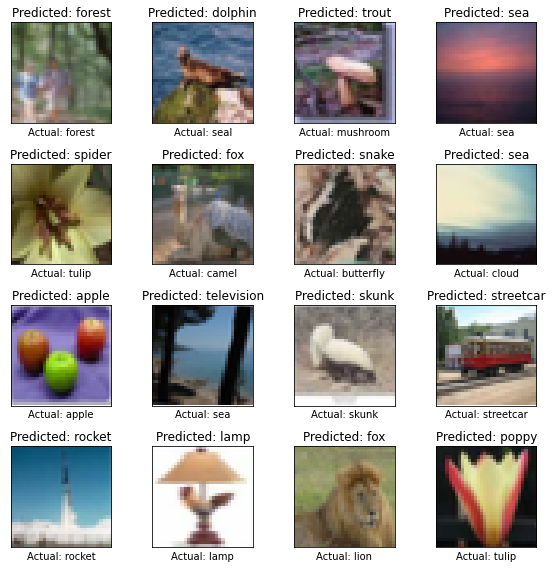

In [7]:
model = cifar100()
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=100)

# models.save_model(model, 'F:/Prasen/Saved Model/')
# print('Model Saved')

# model = models.load_model('F:/Prasen/Saved Model/cifar10/')
# print('Model Reloaded')

pred = model.predict(x_test)

fig = plt.figure(figsize=(8, 8))

for i in range(1, 17):
  img = x_test[i]
  fig.add_subplot(4, 4, i)
  plt.imshow(img)
  plt.xlabel('Actual: ' + class_names[int(y_test[i])])
  plt.title('Predicted: ' + class_names[np.argmax(pred[i])])
  plt.xticks([])
  plt.yticks([]) 
plt.tight_layout()
plt.show()
